In [1]:
import pandas as pd
import numpy as np


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords  #pip install nltk
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
from nltk.stem.porter import PorterStemmer
import string

from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from gensim.models import word2vec  #pip install word2vec

#from wordcloud import WordCloud  #pip install wordcloud

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import NMF, LatentDirichletAllocation

from textblob import TextBlob  #Sentiment Analysis - pip install textblob
from sklearn.decomposition import TruncatedSVD, NMF

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shkhan2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\Users\shkhan2\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [30]:
df_papers = pd.read_csv('../../../../cs82_advanced_machine_learning_data/HW2/papers.csv')
print(df_papers.shape)
df_papers.head()
df_papers_orig = df_papers.copy()

(7241, 7)


In [3]:
# LOWER CASE
df_papers.loc[:,'title'] = df_papers.title.apply(lambda x : x.lower())
df_papers.loc[:,'paper_text'] = df_papers.paper_text.apply(lambda x : x.lower())

#KEEP ONLY ALPHANUMERIC
regex = re.compile(r'\W+')
df_papers.loc[:,'title'] = df_papers.title.apply(lambda x: regex.sub(' ', x))
df_papers.loc[:,'paper_text'] = df_papers.paper_text.apply(lambda x: regex.sub(' ', x))

In [4]:
#CONVERT TO BOW
df_papers.loc[:,'title'] = df_papers['title'].apply(lambda x: x.split(' '))
df_papers.loc[:,'paper_text'] = df_papers['paper_text'].apply(lambda x: x.split(' '))

In [5]:
porter = PorterStemmer()
stops = set(stopwords.words("english"))
stops = stops.union(set("year"))

#REMOVE STOP WORDS
df_papers.loc[:,'title'] = df_papers['title'].apply(lambda x: [word for word in x if word not in stops])
df_papers.loc[:,'paper_text'] = df_papers['paper_text'].apply(lambda x: [word for word in x if word not in stops])


In [6]:
df_papers.head(100)

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,"[self, organization, associative, database, ap...",NaN,1-self-organization-of-associative-database-an...,Abstract Missing,"[767, self, organization, associative, databas..."
1,10,1987,"[mean, field, theory, layer, iv, visual, corte...",NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,"[683, mean, field, theory, layer, iv, visual, ..."
2,100,1988,"[storing, covariance, associative, long, term,...",NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,"[394, storing, covariance, associative, long, ..."
3,1000,1994,"[bayesian, query, construction, neural, networ...",NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,"[bayesian, query, construction, neural, networ..."
4,1001,1994,"[neural, network, ensembles, cross, validation...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"[neural, network, ensembles, cross, validation..."
5,1002,1994,"[using, neural, net, instantiate, deformable, ...",NaN,1002-using-a-neural-net-to-instantiate-a-defor...,Abstract Missing,"[u, sing, neural, net, instantiate, deformable..."
6,1003,1994,"[plasticity, mediated, competitive, learning]",NaN,1003-plasticity-mediated-competitive-learning.pdf,Abstract Missing,"[plasticity, mediated, competitive, learning, ..."
7,1004,1994,"[iceg, morphology, classification, using, anal...",NaN,1004-iceg-morphology-classification-using-an-a...,Abstract Missing,"[iceg, morphology, classification, using, anal..."
8,1005,1994,"[real, time, control, tokamak, plasma, using, ...",NaN,1005-real-time-control-of-a-tokamak-plasma-usi...,Abstract Missing,"[real, time, control, tokamak, plasma, using, ..."
9,1006,1994,"[pulsestream, synapses, non, volatile, analogu...",NaN,1006-pulsestream-synapses-with-non-volatile-an...,Abstract Missing,"[real, time, control, tokamak, plasma, using, ..."


In [7]:
# INCREASE WEIGHT ON THE WORDS USED IN THE TITLES BY COUNTING THEM 4 times
title_overcount_factor = 3

def build_corpus(data): 
    corpus = []
    for index, row in data.iterrows():
        title = []
        for i in range(title_overcount_factor):
            title = row['title'] + title
        content = title + row['paper_text']
        corpus.append(" ".join(content))
    return corpus

corpus = build_corpus(df_papers)


In [8]:
print(corpus[2])

storing covariance associative long term potentiation depression synaptic strengths hippocampus storing covariance associative long term potentiation depression synaptic strengths hippocampus storing covariance associative long term potentiation depression synaptic strengths hippocampus 394 storing covariance associative long term potentiation depression synaptic strengths hippocampus patric k stanton terrence j sejnowski department biophysics johns hopkins university baltimore md 21218 abstract modeling studies memory based neural networks selective enhancement depression synaptic strengths required ror effident storage inrormation sejnowski 1977a b kohonen 1984 bienenstock et ai 1982 sejnowski tesauro 1989 tested assumption hippocampus cortical structure brain involved long term memory brier high frequency activation excitatory synapses hippocampus produces increase synaptic strength known long term potentiation ltp buss lomo 1973 last ror many days ltp known hebbian since requires s

In [9]:
# PARAMETERS FOR TFIDF
min_ngram = 2
max_ngram = 2

max_df = 0.90
min_df = 2
max_features = 500

vectorizer = TfidfVectorizer(ngram_range=(min_ngram, max_ngram), max_features = max_features, max_df = max_df)
X = vectorizer.fit_transform(corpus)
print(X.get_shape())
print((vectorizer.get_feature_names()))
#print(X.has_sorted_indices)

(7241, 500)
['00 00', '10 000', '10 10', '10 100', '10 11', '10 12', '10 15', '10 20', '100 100', '100 150', '100 200', '11 12', '12 13', '13 14', '14 15', '15 10', '15 16', '15 20', '16 17', '20 10', '20 20', '20 25', '20 30', '20 40', '30 40', '40 50', '40 60', '50 100', '50 50', '60 80', '80 100', 'ac uk', 'active learning', 'advances neural', 'al 2015', 'al 2016', 'algorithm based', 'allows us', 'also used', 'analysis machine', 'annals statistics', 'annual conference', 'approximate inference', 'approximation error', 'arg max', 'arg min', 'artificial intelligence', 'artificial neural', 'arxiv preprint', 'back propagation', 'based methods', 'basis function', 'basis functions', 'bayesian inference', 'bayesian networks', 'belief propagation', 'best knowledge', 'better performance', 'binary classification', 'boltzmann machines', 'c1 c2', 'cambridge university', 'chain monte', 'cifar 10', 'classification accuracy', 'closed form', 'closely related', 'commonly used', 'component analysis', 

In [10]:
# SOURCE : https://www.kaggle.com/rjhere23/nips-papers-visualized-with-nmf-and-t-sne
# FIND TOP TOPICS
n_topics = 5
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
    
nmf = NMF(n_components=n_topics, random_state=0,alpha=.1, l1_ratio=.5).fit(X)

print("Topics found via NMF:")
tfidf_feature_names = vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

Topics found via NMF:

Topic #0:
machine learning support vector loss function training set low rank optimization problem upper bound lower bound xi yi gradient descent international conference training data data sets semi supervised objective function convex optimization data set supervised learning vector machines high dimensional

Topic #1:
neural networks neural network hidden units hidden layer training set recurrent neural back propagation speech recognition input output artificial neural shown figure test set feed forward training data neural net fully connected convolutional neural neural computation network architecture deep learning

Topic #2:
reinforcement learning value function optimal policy state action state space markov decision dynamic programming reward function decision processes function approximation time step policy gradient st st machine learning time steps model based decision making artificial intelligence optimal value transition probabilities

Topic #3:
et a

In [11]:
# CONVERT TFIDF RESULTS TO PANDAS DATA FRAME
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
print(df_tfidf.shape)
# ADD THE YEAR COLUMN TO THE DATAFRAME
df_tfidf['year'] = df_papers['year']
df_tfidf['count'] = 1
print(df_tfidf.shape)


df_tfidf.head()



(7241, 500)
(7241, 502)


,00 00,10 000,10 10,10 100,10 11,10 12,10 15,10 20,100 100,100 150,...,xk xk,xt xt,xt yt,yi xi,yi yi,york ny,yt yt,zero mean,year,count
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,1987,1
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,1987,1
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,1988,1
3,0.0,0.058388,0.0,0.0,0.0,0.0,0.049399,0.000000,0.0,0.0,...,0.0,0.121508,0.0,0.05816,0.0,0.0,0.0,0.050624,1994,1
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.035714,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,1994,1


In [12]:
#GROUP BY YEAR

#GET THE NUMBER OF PAPERS FOR EACH YEAR 
counts = df_tfidf.groupby(['year']).agg(['count'])['count']

#TAKE THE MEAN IDF SCORE FOR EACH FEATURE
df_tfidf_year = df_tfidf.groupby(['year']).mean()

#ADD THE COUNT COLUMN FOR EACH YEAR FOR FUTURE USE
df_tfidf_year['count'] = counts
df_tfidf_year.head(32)


,00 00,10 000,10 10,10 100,10 11,10 12,10 15,10 20,100 100,100 150,...,xj xi,xk xk,xt xt,xt yt,yi xi,yi yi,york ny,yt yt,zero mean,count
year,,,,,,,,,,,,,,,,,,,,,
1987,0.012725,0.002895,0.013076,0.003752,0.015911,0.003289,0.003508,0.010502,0.009058,0.000746,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.004364,0.004761,0.000000,0.006450,90
1988,0.011236,0.003568,0.034233,0.008880,0.010592,0.008558,0.006660,0.006976,0.004306,0.002437,...,0.003015,0.000000,0.000000,0.002045,0.000371,0.002730,0.002683,0.000000,0.005260,94
1989,0.004569,0.007486,0.015825,0.001259,0.003462,0.002981,0.004212,0.010950,0.002063,0.006651,...,0.000772,0.000000,0.000869,0.000000,0.000424,0.000000,0.003950,0.000000,0.003801,101
1990,0.024496,0.003061,0.012773,0.004036,0.006659,0.000485,0.004842,0.013730,0.002653,0.002719,...,0.000000,0.001448,0.000568,0.000000,0.000000,0.001851,0.001053,0.000865,0.003234,143
1991,0.011767,0.007292,0.020169,0.005314,0.003461,0.001099,0.006752,0.010984,0.011471,0.003486,...,0.000660,0.001000,0.004993,0.000000,0.003491,0.000565,0.001818,0.000000,0.006142,144
1992,0.020160,0.004228,0.003284,0.003953,0.003714,0.002350,0.004138,0.006874,0.008416,0.002521,...,0.000653,0.000000,0.002197,0.000576,0.001611,0.001794,0.005087,0.001546,0.006525,127
1993,0.017179,0.002524,0.005559,0.003749,0.002775,0.002808,0.005306,0.010308,0.005355,0.005805,...,0.000000,0.001536,0.001021,0.000355,0.001688,0.001850,0.009565,0.001533,0.008504,158
1994,0.013413,0.007421,0.011720,0.003601,0.006244,0.006009,0.006414,0.010280,0.006044,0.006750,...,0.001272,0.000000,0.003428,0.001599,0.001843,0.003916,0.001699,0.002336,0.005841,140
1995,0.004896,0.002130,0.013058,0.003810,0.002854,0.012924,0.003662,0.008641,0.007662,0.005264,...,0.000000,0.000596,0.002231,0.001818,0.000761,0.000000,0.003700,0.002341,0.005221,152


In [13]:
# NORMALIZE FOR THE GROWTH IN THE NUMBER OF PAPERS IN THE CONFERENCE
#total_papers = df_tfidf_year['count'].sum()
#print(total_papers)

#for year in df_tfidf_year.index:
#     df_tfidf_year.loc[year,:] = total_papers/df_tfidf_year.loc[year,:]['count'] * df_tfidf_year.loc[year,:]


#RESTORE THE COUNTS COLUMN
#df_tfidf_year['count'] = counts
#df_tfidf_year.head(32)

Int64Index([1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
            1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64', name='year')
52


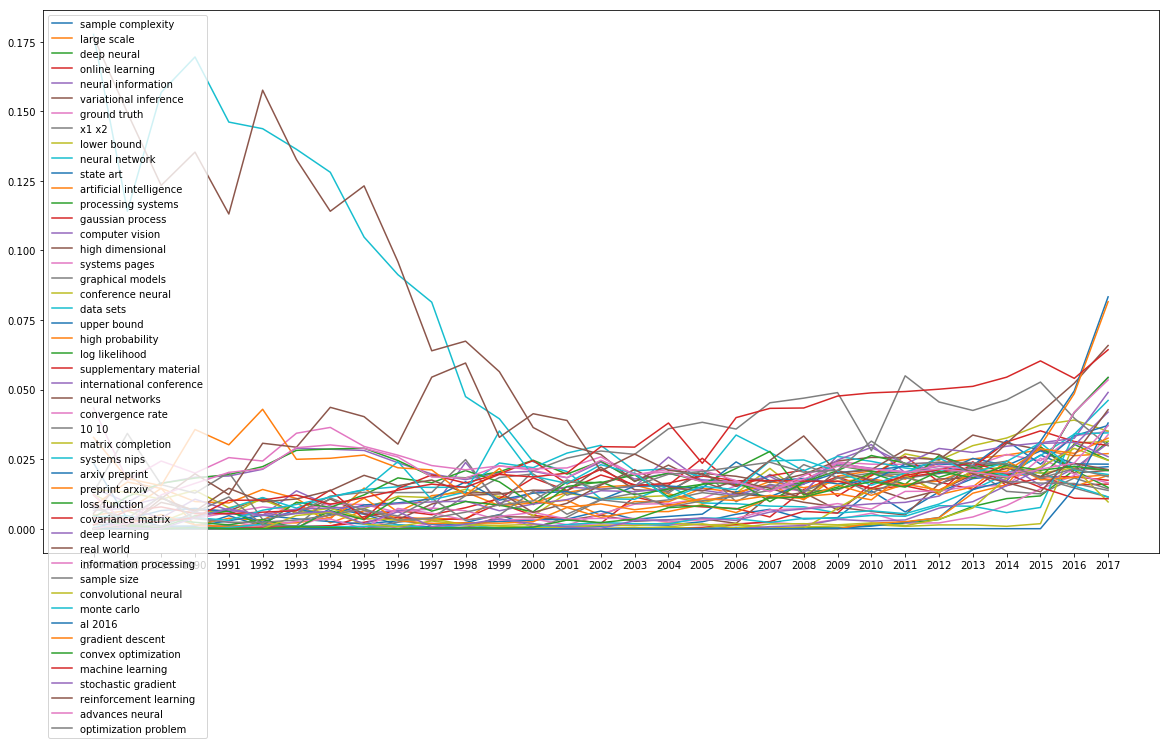

In [14]:
topN_topics = 25
min_year = 2013
max_year = 2017


# ITERATE THROUGH EACH YEAR AND PICK THE TOP (top_n) TOPICS FROM EACH YEAR TO PLOT
years = df_tfidf_year.index
print(years)
topics  = set()
for year in years:
        if (year >= min_year) & (year <=max_year):
            tfidf_sorted = df_tfidf_year.T.sort_values(by=[year], ascending=False)
            #print(tfidf_sorted.head(20))
            topics = topics.union(set(tfidf_sorted.index[:topN_topics]))

print(len(topics))

# REMOVE TOPICS THAT ARE KNOWN TO BE NOT RELATED TO MACHINE LEARNING
remove_set = set(["using", "et al", "count", "based", "via", "semi", "online", 
                  "large", "multi", "analysis", "data", "stochastic", "log log", "low rank"])

# FINAL LIST OF TOPICS TO PLOT
topics = topics.difference(remove_set)

plt.figure(figsize=(20,10))
for topic in topics:
    plt.plot(df_tfidf_year.index, df_tfidf_year.loc[:,topic])
plt.xticks(df_tfidf_year.index)
plt.legend(loc = 'upper left')


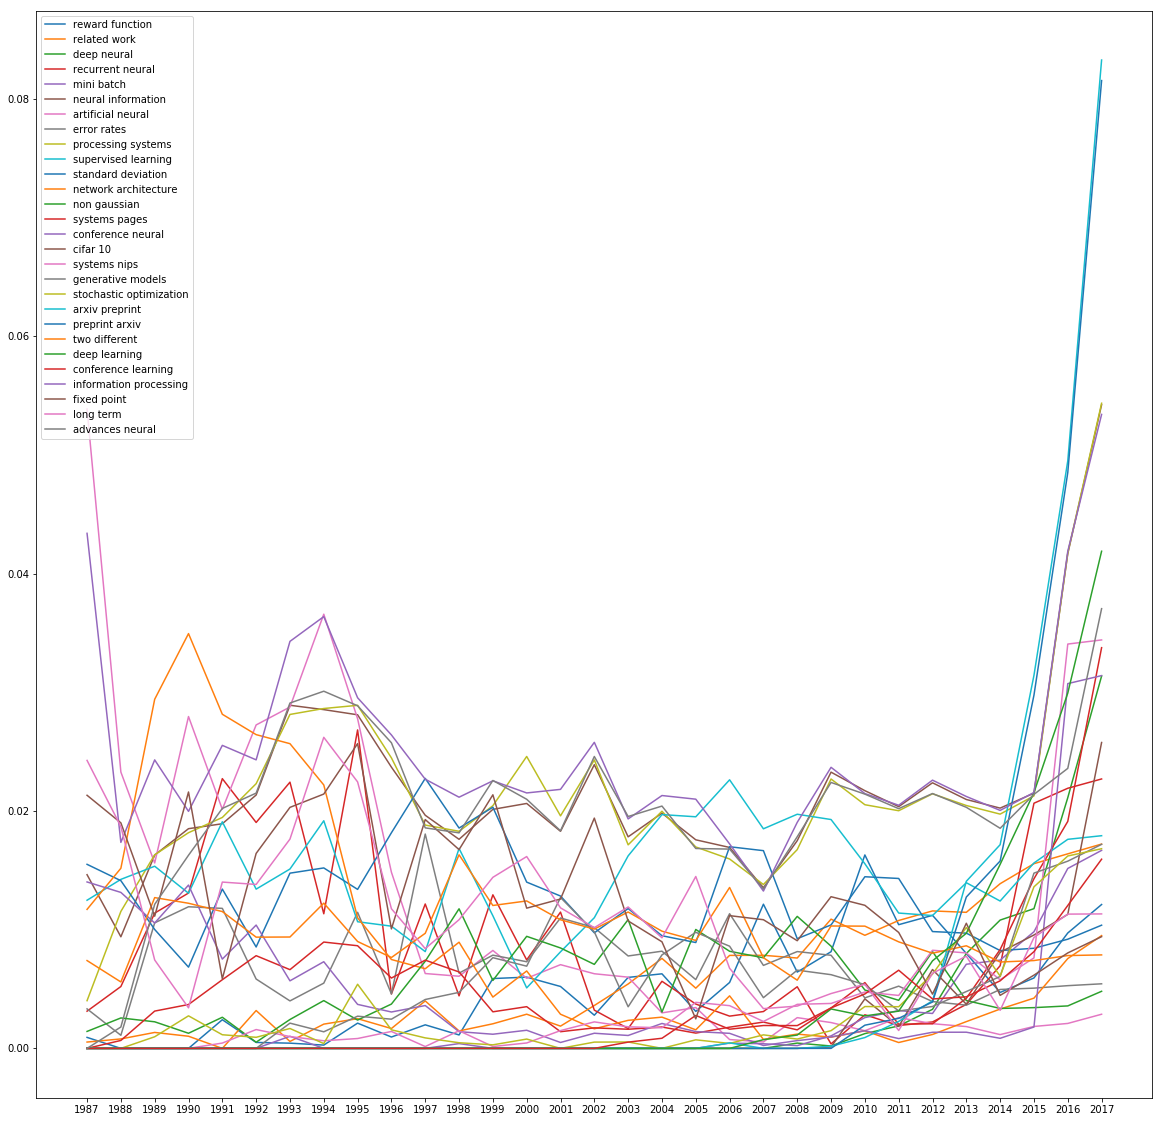

In [15]:
topics = set()
for column in df_tfidf_year.columns:
    #print(df_tfidf_year.loc[2017,column])
    #print(df_tfidf_year.loc[2016,column]) 
    if df_tfidf_year.loc[2017,column] > df_tfidf_year.loc[2016, column] > df_tfidf_year.loc[2015, column] >df_tfidf_year.loc[2014, column] :
         #print("2017")
         #print(df_tfidf_year.loc[2017,column])
         #print(df_tfidf_year.loc[2016,column])
         #print(df_tfidf_year.loc[2015,column])
         #print(column)
         topics.add(column)
        
        
# REMOVE TOPICS THAT ARE KNOWN TO BE NOT RELATED TO MACHINE LEARNING
remove_set = set(["using", "et al", "count", "based", "via", "semi", "online", "neural networks", "neural network", "related work" 
                  "large", "multi", "analysis", "data", "stochastic", "log log", "low rank", "end end", "international conference"])
        
# FINAL LIST OF TOPICS TO PLOT
topics = topics.difference(remove_set)

#topics = set(["computer vision", "deep learning", "neural networks", "value function", "pattern recognition",
#               "reinforcement learning" ,"information processing"])

#print(topics)

def plot_trend(df, topics):
    plt.figure(figsize=(20,20))
    for topic in topics:
        plt.plot(df.index, df.loc[:,topic])
    plt.xticks(df.index)
    plt.legend(loc = 'upper left')
    
plot_trend(df_tfidf_year, topics)

### FIND TOPICS AND PLOT TOPICS AGAINST TIME

In [16]:
n_samples = len(corpus)

print ("There are %i documents to analyze." % n_samples)

n_features = 2000
n_components = 10
n_top_words = 20

There are 7241 documents to analyze.


In [17]:
from datetime import datetime
from time import time

n_features = 2000

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features)
t0 = time()
tf = tf_vectorizer.fit_transform(corpus)
print("done in %0.3fs." % (time() - t0))
print()

print("\nThe shape of our count vector matrix: ",tf.shape)
print(tf_vectorizer.get_feature_names()[:30])

tf.toarray()

done in 23.249s.


The shape of our count vector matrix:  (7241, 2000)
['00', '000', '01', '02', '03', '04', '05', '06', '08', '100', '1000', '11', '12', '13', '14', '15', '150', '16', '17', '18', '19', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994']


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
n_components = 10
n_top_words = 20
n_samples = len(corpus)

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

Fitting LDA models with tf features, n_samples=7241 and n_features=2000...
done in 121.362s.


In [19]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print()
    print()
    
    
print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model:
Topic #0: learning data kernel classification training feature xi features class methods method problem test function loss label classifier based regression performance

Topic #1: state learning policy time action reward value algorithm function regret optimal agent states actions reinforcement control model problem based decision

Topic #2: model neurons time neural figure neuron input spike network activity response system stimulus cells cell information fig brain rate synaptic

Topic #3: algorithm graph tree node nodes time algorithms learning number search graphs gradient problem size edge edges trees update step figure

Topic #4: matrix data clustering rank algorithm cluster points number problem low matrices clusters distance spectral method analysis tensor dimensional pca figure

Topic #5: gaussian noise linear time function matrix sparse covariance data estimation model mean variance signal information method process gp estimate functions

Topic #6: networ

In [20]:
topic_names = {0:'topic_0',
               1:'topic_1',
               2:'topic_2',
               3:'topic_3',
               4:'topic_4',
               5:'topic_5',
               6:'topic_6',
               7:'topic_7',
               8:'topic_8',
               9:'topic_9'
              }
doc_topic_distrib = lda.transform(tf)
print(doc_topic_distrib)

[[9.72295387e-03 1.03175659e-01 1.74489311e-01 ... 7.85781070e-05
  1.98444192e-01 2.02546357e-01]
 [1.03867043e-04 2.95216002e-03 8.37296349e-01 ... 1.03867401e-04
  1.03862012e-04 2.83142582e-02]
 [1.03977043e-04 1.03973302e-04 9.41414481e-01 ... 1.03968211e-04
  1.03969244e-04 1.96488887e-02]
 ...
 [1.19936080e-04 1.19933498e-04 6.13461819e-01 ... 1.19928580e-04
  2.55838718e-02 1.19927940e-04]
 [5.32239890e-02 2.39424869e-02 6.54321259e-01 ... 7.97030595e-05
  6.53862999e-02 7.96995985e-05]
 [7.23786399e-05 9.30676840e-02 1.20425634e-01 ... 7.23780426e-05
  5.06661695e-01 7.23756164e-05]]


In [21]:
print(doc_topic_distrib.shape)

(7241, 10)


In [22]:
def print_topic_names (i, idx, topic_names):
    print("Document: %d:" %i)
    for index in idx:
        print("%s" % topic_names.get(index))

top_n_topics = 3
for i, doc in enumerate(doc_topic_distrib):
    idx = doc.argsort()[::-1][:top_n_topics]
    print(idx)
    print(doc[idx])
    print_topic_names(i, idx, topic_names)
    

[9 8 2]
[0.20254636 0.19844419 0.17448931]
Document: 0:
topic_9
topic_8
topic_2
[2 5 6]
[0.83729635 0.07158209 0.05933581]
Document: 1:
topic_2
topic_5
topic_6
[2 5 9]
[0.94141448 0.03239613 0.01964889]
Document: 2:
topic_2
topic_5
topic_9
[7 6 0]
[0.27865772 0.17651244 0.17484534]
Document: 3:
topic_7
topic_6
topic_0
[6 0 5]
[0.59329677 0.24790006 0.1374557 ]
Document: 4:
topic_6
topic_0
topic_5
[6 8 7]
[0.46745998 0.2862502  0.17341789]
Document: 5:
topic_6
topic_8
topic_7
[6 2 3]
[0.36352139 0.2371693  0.19667046]
Document: 6:
topic_6
topic_2
topic_3
[6 2 0]
[0.42953809 0.3954792  0.15173459]
Document: 7:
topic_6
topic_2
topic_0
[6 2 5]
[0.42855863 0.3833295  0.15868169]
Document: 8:
topic_6
topic_2
topic_5
[2 6 5]
[0.4831471  0.3532845  0.10289504]
Document: 9:
topic_2
topic_6
topic_5
[1 6 0]
[0.49352797 0.41882676 0.07868369]
Document: 10:
topic_1
topic_6
topic_0
[4 7 5]
[0.43993987 0.23198126 0.17563928]
Document: 11:
topic_4
topic_7
topic_5
[6 5 3]
[0.77741145 0.09185226 0.08506

topic_2
topic_3
[2 6 0]
[9.99278643e-01 8.01747499e-05 8.01597274e-05]
Document: 143:
topic_2
topic_6
topic_0
[6 2 8]
[0.55594087 0.28277658 0.11954631]
Document: 144:
topic_6
topic_2
topic_8
[9 2 4]
[0.42058435 0.31203634 0.08357479]
Document: 145:
topic_9
topic_2
topic_4
[4 0 5]
[0.37614304 0.3412783  0.16468873]
Document: 146:
topic_4
topic_0
topic_5
[7 5 4]
[0.39877693 0.34781256 0.15481542]
Document: 147:
topic_7
topic_5
topic_4
[1 9 5]
[0.69683864 0.27496357 0.01466577]
Document: 148:
topic_1
topic_9
topic_5
[2 6 1]
[0.51849194 0.30717565 0.17362368]
Document: 149:
topic_2
topic_6
topic_1
[2 5 7]
[0.68917656 0.17054206 0.08001274]
Document: 150:
topic_2
topic_5
topic_7
[6 9 2]
[0.32833743 0.31703994 0.21932506]
Document: 151:
topic_6
topic_9
topic_2
[1 2 6]
[0.36226813 0.2644677  0.25804286]
Document: 152:
topic_1
topic_2
topic_6
[6 0 8]
[0.31015774 0.26645808 0.18781786]
Document: 153:
topic_6
topic_0
topic_8
[6 2 3]
[0.50605094 0.13496845 0.1332078 ]
Document: 154:
topic_6
topi

Document: 299:
topic_1
topic_5
topic_9
[7 2 4]
[0.49228276 0.4713941  0.02423452]
Document: 300:
topic_7
topic_2
topic_4
[6 2 1]
[0.63922013 0.1191068  0.09380117]
Document: 301:
topic_6
topic_2
topic_1
[6 5 2]
[0.53811666 0.40582568 0.0553563 ]
Document: 302:
topic_6
topic_5
topic_2
[2 7 6]
[0.59931472 0.1636817  0.14697209]
Document: 303:
topic_2
topic_7
topic_6
[1 3 9]
[0.88634575 0.08383481 0.0181965 ]
Document: 304:
topic_1
topic_3
topic_9
[6 3 7]
[0.41604151 0.29441436 0.23354033]
Document: 305:
topic_6
topic_3
topic_7
[2 8 4]
[0.76738785 0.15382625 0.04475878]
Document: 306:
topic_2
topic_8
topic_4
[6 0 7]
[0.68495178 0.19617622 0.11828061]
Document: 307:
topic_6
topic_0
topic_7
[2 6 3]
[0.78816035 0.11806441 0.09278771]
Document: 308:
topic_2
topic_6
topic_3
[6 2 7]
[0.52711781 0.15849871 0.10873862]
Document: 309:
topic_6
topic_2
topic_7
[5 7 4]
[0.32579044 0.26084325 0.14121889]
Document: 310:
topic_5
topic_7
topic_4
[1 5 2]
[0.41255807 0.33285575 0.11896036]
Document: 311:
t

topic_3
[5 6 4]
[0.71930286 0.1143927  0.09352066]
Document: 466:
topic_5
topic_6
topic_4
[6 7 0]
[0.36486596 0.32161666 0.22326449]
Document: 467:
topic_6
topic_7
topic_0
[6 1 9]
[0.54195257 0.24525591 0.13721695]
Document: 468:
topic_6
topic_1
topic_9
[1 0 6]
[0.784469   0.11168898 0.06397338]
Document: 469:
topic_1
topic_0
topic_6
[7 5 6]
[0.45438469 0.28710896 0.14932129]
Document: 470:
topic_7
topic_5
topic_6
[2 6 3]
[0.44122438 0.36095962 0.11479374]
Document: 471:
topic_2
topic_6
topic_3
[2 5 6]
[0.58059765 0.2111609  0.11872678]
Document: 472:
topic_2
topic_5
topic_6
[3 1 0]
[0.38920463 0.22918258 0.15116201]
Document: 473:
topic_3
topic_1
topic_0
[6 9 2]
[0.6283851  0.1479601  0.10941164]
Document: 474:
topic_6
topic_9
topic_2
[2 0 6]
[0.63303064 0.10788333 0.07895071]
Document: 475:
topic_2
topic_0
topic_6
[1 6 2]
[0.66292364 0.16254622 0.15028949]
Document: 476:
topic_1
topic_6
topic_2
[2 8 7]
[0.3270549  0.30547749 0.15850162]
Document: 477:
topic_2
topic_8
topic_7
[8 6 7]


topic_5
topic_6
topic_9
[6 8 5]
[0.76930364 0.06847151 0.06349478]
Document: 633:
topic_6
topic_8
topic_5
[7 4 5]
[0.30934124 0.24563662 0.20898613]
Document: 634:
topic_7
topic_4
topic_5
[4 0 8]
[0.48607939 0.2582352  0.21178963]
Document: 635:
topic_4
topic_0
topic_8
[0 9 6]
[0.72772607 0.15493678 0.05781683]
Document: 636:
topic_0
topic_9
topic_6
[1 7 9]
[0.31743617 0.14704793 0.13958037]
Document: 637:
topic_1
topic_7
topic_9
[8 5 6]
[0.43724145 0.28437899 0.09758663]
Document: 638:
topic_8
topic_5
topic_6
[6 1 2]
[0.2520393  0.23306106 0.22905707]
Document: 639:
topic_6
topic_1
topic_2
[1 6 2]
[0.89958055 0.03940254 0.03294021]
Document: 640:
topic_1
topic_6
topic_2
[2 5 1]
[0.54019779 0.25068111 0.07381541]
Document: 641:
topic_2
topic_5
topic_1
[7 1 3]
[0.3688203  0.2528472  0.23017763]
Document: 642:
topic_7
topic_1
topic_3
[2 8 3]
[0.5598653  0.25435104 0.08933027]
Document: 643:
topic_2
topic_8
topic_3
[6 2 3]
[0.55017706 0.44204761 0.00736175]
Document: 644:
topic_6
topic_2


[2 4 8]
[0.71478352 0.1336401  0.12167669]
Document: 799:
topic_2
topic_4
topic_8
[2 9 6]
[0.64462866 0.22357959 0.06839795]
Document: 800:
topic_2
topic_9
topic_6
[7 0 3]
[0.44293832 0.2957946  0.09857223]
Document: 801:
topic_7
topic_0
topic_3
[2 8 6]
[0.70531894 0.12428978 0.1139291 ]
Document: 802:
topic_2
topic_8
topic_6
[9 0 5]
[0.72502666 0.2567181  0.01777925]
Document: 803:
topic_9
topic_0
topic_5
[0 5 4]
[0.44252019 0.32848243 0.20417544]
Document: 804:
topic_0
topic_5
topic_4
[9 3 0]
[0.59468076 0.30196448 0.10280646]
Document: 805:
topic_9
topic_3
topic_0
[1 7 5]
[0.19903864 0.17447929 0.1717816 ]
Document: 806:
topic_1
topic_7
topic_5
[9 5 7]
[0.67573963 0.13994143 0.09832792]
Document: 807:
topic_9
topic_5
topic_7
[6 5 8]
[0.65266081 0.11835632 0.05762707]
Document: 808:
topic_6
topic_5
topic_8
[1 2 6]
[0.61430426 0.20494369 0.06335233]
Document: 809:
topic_1
topic_2
topic_6
[7 5 6]
[0.42419466 0.32095455 0.12624701]
Document: 810:
topic_7
topic_5
topic_6
[8 7 2]
[0.47661

topic_6
topic_5
[2 5 9]
[0.43242761 0.33550014 0.17259104]
Document: 966:
topic_2
topic_5
topic_9
[5 7 8]
[0.34496819 0.17884975 0.16994824]
Document: 967:
topic_5
topic_7
topic_8
[8 6 7]
[0.34943683 0.30975202 0.18621599]
Document: 968:
topic_8
topic_6
topic_7
[0 9 5]
[0.52803863 0.1356037  0.12189203]
Document: 969:
topic_0
topic_9
topic_5
[1 7 6]
[0.582685   0.20622604 0.19942833]
Document: 970:
topic_1
topic_7
topic_6
[2 8 1]
[0.52015661 0.41915989 0.05458701]
Document: 971:
topic_2
topic_8
topic_1
[2 6 1]
[0.45565421 0.4454374  0.08565756]
Document: 972:
topic_2
topic_6
topic_1
[7 3 5]
[0.44208823 0.25942911 0.17852723]
Document: 973:
topic_7
topic_3
topic_5
[9 0 5]
[0.69998915 0.26487782 0.03456655]
Document: 974:
topic_9
topic_0
topic_5
[7 1 8]
[0.39443611 0.28775445 0.16844873]
Document: 975:
topic_7
topic_1
topic_8
[5 0 7]
[0.51157691 0.23706643 0.16850623]
Document: 976:
topic_5
topic_0
topic_7
[2 7 6]
[0.76628039 0.1073018  0.06160184]
Document: 977:
topic_2
topic_7
topic_6


[0.39386799 0.2066762  0.16550332]
Document: 1132:
topic_2
topic_6
topic_4
[4 5 9]
[0.73898657 0.13540696 0.09896819]
Document: 1133:
topic_4
topic_5
topic_9
[2 8 4]
[0.5581034  0.38303522 0.05831352]
Document: 1134:
topic_2
topic_8
topic_4
[7 6 2]
[0.49567646 0.14915524 0.12606991]
Document: 1135:
topic_7
topic_6
topic_2
[0 9 5]
[0.51024001 0.33323591 0.13756435]
Document: 1136:
topic_0
topic_9
topic_5
[0 9 3]
[0.67108023 0.16392145 0.08813442]
Document: 1137:
topic_0
topic_9
topic_3
[2 7 8]
[0.8086458  0.17145883 0.0194245 ]
Document: 1138:
topic_2
topic_7
topic_8
[1 5 3]
[0.27185391 0.24520082 0.13010962]
Document: 1139:
topic_1
topic_5
topic_3
[2 1 8]
[0.68677539 0.15837863 0.1401789 ]
Document: 1140:
topic_2
topic_1
topic_8
[9 0 3]
[0.41802374 0.21148472 0.19107595]
Document: 1141:
topic_9
topic_0
topic_3
[7 6 3]
[0.4910657  0.22933356 0.14082228]
Document: 1142:
topic_7
topic_6
topic_3
[0 7 9]
[0.45667191 0.36393249 0.17725891]
Document: 1143:
topic_0
topic_7
topic_9
[1 9 7]
[0.6

topic_3
[4 3 8]
[0.38930207 0.32718347 0.13667595]
Document: 1299:
topic_4
topic_3
topic_8
[2 5 8]
[0.36300953 0.27883813 0.22786614]
Document: 1300:
topic_2
topic_5
topic_8
[5 7 0]
[0.407533   0.40118622 0.12297553]
Document: 1301:
topic_5
topic_7
topic_0
[5 7 8]
[0.74117681 0.14963534 0.04890166]
Document: 1302:
topic_5
topic_7
topic_8
[0 9 5]
[0.4717824  0.32682256 0.1667908 ]
Document: 1303:
topic_0
topic_9
topic_5
[2 0 3]
[9.64893821e-01 3.45345913e-02 7.14503904e-05]
Document: 1304:
topic_2
topic_0
topic_3
[2 5 6]
[0.84391376 0.07415036 0.05519835]
Document: 1305:
topic_2
topic_5
topic_6
[2 0 3]
[0.89021383 0.09981236 0.00952924]
Document: 1306:
topic_2
topic_0
topic_3
[2 6 7]
[0.75277565 0.13842792 0.03944019]
Document: 1307:
topic_2
topic_6
topic_7
[7 3 5]
[0.57194343 0.29008992 0.04686658]
Document: 1308:
topic_7
topic_3
topic_5
[1 9 4]
[0.43271524 0.19130281 0.16332655]
Document: 1309:
topic_1
topic_9
topic_4
[0 9 5]
[0.51700979 0.35654071 0.06385759]
Document: 1310:
topic_0


Document: 1465:
topic_7
topic_2
topic_8
[0 7 9]
[0.41900296 0.31654421 0.14975097]
Document: 1466:
topic_0
topic_7
topic_9
[2 5 0]
[0.83407033 0.15327132 0.01206948]
Document: 1467:
topic_2
topic_5
topic_0
[2 5 7]
[0.53506705 0.27841885 0.09915748]
Document: 1468:
topic_2
topic_5
topic_7
[0 9 5]
[0.51503119 0.16615149 0.15099748]
Document: 1469:
topic_0
topic_9
topic_5
[2 6 9]
[0.87212387 0.0598444  0.03439527]
Document: 1470:
topic_2
topic_6
topic_9
[8 3 4]
[0.75628516 0.1399172  0.0405566 ]
Document: 1471:
topic_8
topic_3
topic_4
[3 7 5]
[0.49341569 0.39286    0.05664131]
Document: 1472:
topic_3
topic_7
topic_5
[6 8 2]
[0.80695941 0.08719663 0.04326008]
Document: 1473:
topic_6
topic_8
topic_2
[4 9 8]
[0.48573556 0.46299585 0.02555397]
Document: 1474:
topic_4
topic_9
topic_8
[5 1 3]
[0.35111188 0.18157763 0.17271788]
Document: 1475:
topic_5
topic_1
topic_3
[2 0 3]
[0.92394389 0.07070364 0.00490131]
Document: 1476:
topic_2
topic_0
topic_3
[6 7 5]
[0.41963242 0.40947256 0.16511899]
Docu

[0 2 8]
[0.44012886 0.25240174 0.16619546]
Document: 1632:
topic_0
topic_2
topic_8
[1 3 8]
[0.79847946 0.08084095 0.04524914]
Document: 1633:
topic_1
topic_3
topic_8
[4 0 7]
[0.3895854  0.20765492 0.18007157]
Document: 1634:
topic_4
topic_0
topic_7
[0 8 1]
[0.45471777 0.2405487  0.14819805]
Document: 1635:
topic_0
topic_8
topic_1
[7 3 4]
[0.58764094 0.36028942 0.04891053]
Document: 1636:
topic_7
topic_3
topic_4
[1 9 2]
[7.97755358e-01 2.01743882e-01 6.26028883e-05]
Document: 1637:
topic_1
topic_9
topic_2
[2 6 3]
[8.78051192e-01 1.21208567e-01 9.25388379e-05]
Document: 1638:
topic_2
topic_6
topic_3
[6 2 1]
[0.34206073 0.25348598 0.24989037]
Document: 1639:
topic_6
topic_2
topic_1
[2 5 7]
[0.47846917 0.36620965 0.05941245]
Document: 1640:
topic_2
topic_5
topic_7
[2 8 3]
[0.80062888 0.15136765 0.02920226]
Document: 1641:
topic_2
topic_8
topic_3
[4 5 8]
[0.32151587 0.27048819 0.21735619]
Document: 1642:
topic_4
topic_5
topic_8
[2 6 8]
[0.36854857 0.24093387 0.19628614]
Document: 1643:
topi

topic_1
topic_3
topic_5
[9 1 0]
[5.33835436e-01 4.65725844e-01 5.48445229e-05]
Document: 1799:
topic_9
topic_1
topic_0
[3 1 2]
[0.44573125 0.30021874 0.18138057]
Document: 1800:
topic_3
topic_1
topic_2
[9 3 0]
[0.38014245 0.30480556 0.23646979]
Document: 1801:
topic_9
topic_3
topic_0
[9 7 5]
[0.61294021 0.28096909 0.05662315]
Document: 1802:
topic_9
topic_7
topic_5
[8 0 6]
[0.54101087 0.20129124 0.13580624]
Document: 1803:
topic_8
topic_0
topic_6
[7 4 0]
[0.56755338 0.23054425 0.09902033]
Document: 1804:
topic_7
topic_4
topic_0
[8 5 6]
[0.44035789 0.16579525 0.16462333]
Document: 1805:
topic_8
topic_5
topic_6
[8 4 5]
[0.51630091 0.25332383 0.12664126]
Document: 1806:
topic_8
topic_4
topic_5
[8 5 4]
[0.4574752  0.19456194 0.1551228 ]
Document: 1807:
topic_8
topic_5
topic_4
[8 7 1]
[0.35717939 0.21509937 0.17595255]
Document: 1808:
topic_8
topic_7
topic_1
[2 7 8]
[0.66011873 0.28653985 0.03064041]
Document: 1809:
topic_2
topic_7
topic_8
[2 0 1]
[0.42013772 0.31518451 0.11472985]
Document

[0.68411269 0.25792066 0.04512329]
Document: 1965:
topic_1
topic_9
topic_7
[8 0 3]
[0.35805015 0.35126069 0.13021821]
Document: 1966:
topic_8
topic_0
topic_3
[7 3 5]
[0.59780792 0.27807964 0.09977757]
Document: 1967:
topic_7
topic_3
topic_5
[3 4 2]
[0.4786836  0.3282375  0.07278055]
Document: 1968:
topic_3
topic_4
topic_2
[2 5 6]
[0.78758574 0.10767362 0.10408072]
Document: 1969:
topic_2
topic_5
topic_6
[9 5 0]
[0.68862331 0.11510692 0.11217456]
Document: 1970:
topic_9
topic_5
topic_0
[5 4 0]
[0.50772389 0.16698955 0.16145954]
Document: 1971:
topic_5
topic_4
topic_0
[9 0 7]
[0.397254   0.34559324 0.08979462]
Document: 1972:
topic_9
topic_0
topic_7
[5 7 4]
[0.42134321 0.23082483 0.20019709]
Document: 1973:
topic_5
topic_7
topic_4
[3 0 7]
[0.31131282 0.30713001 0.14215822]
Document: 1974:
topic_3
topic_0
topic_7
[0 4 6]
[0.678663   0.16019629 0.10643068]
Document: 1975:
topic_0
topic_4
topic_6
[8 7 0]
[0.64797619 0.22985629 0.07041893]
Document: 1976:
topic_8
topic_7
topic_0
[5 8 0]
[0.2

topic_9
topic_5
[8 2 5]
[0.39179076 0.22381674 0.17404341]
Document: 2132:
topic_8
topic_2
topic_5
[6 8 2]
[0.42238227 0.3049334  0.13088734]
Document: 2133:
topic_6
topic_8
topic_2
[0 4 3]
[0.67096686 0.18815652 0.11628113]
Document: 2134:
topic_0
topic_4
topic_3
[2 8 5]
[0.5987444  0.24946585 0.08794024]
Document: 2135:
topic_2
topic_8
topic_5
[5 6 0]
[0.51131897 0.26610368 0.11752689]
Document: 2136:
topic_5
topic_6
topic_0
[5 7 3]
[0.27261243 0.147801   0.14301684]
Document: 2137:
topic_5
topic_7
topic_3
[7 2 6]
[0.87102178 0.07495583 0.04015492]
Document: 2138:
topic_7
topic_2
topic_6
[4 5 9]
[0.51939288 0.31365256 0.15584897]
Document: 2139:
topic_4
topic_5
topic_9
[9 0 3]
[0.47589101 0.28303631 0.18261687]
Document: 2140:
topic_9
topic_0
topic_3
[0 5 7]
[0.52911777 0.18472209 0.12191979]
Document: 2141:
topic_0
topic_5
topic_7
[0 9 5]
[0.2763513  0.24704609 0.23758816]
Document: 2142:
topic_0
topic_9
topic_5
[7 2 1]
[0.50171269 0.20430371 0.18336173]
Document: 2143:
topic_7
topi

Document: 2298:
topic_0
topic_9
topic_3
[1 3 5]
[0.64582637 0.17260069 0.14474663]
Document: 2299:
topic_1
topic_3
topic_5
[0 4 8]
[0.51371073 0.37128213 0.04121052]
Document: 2300:
topic_0
topic_4
topic_8
[5 7 3]
[0.52195436 0.1631197  0.10857353]
Document: 2301:
topic_5
topic_7
topic_3
[2 6 8]
[7.07999212e-01 2.91108734e-01 1.11529480e-04]
Document: 2302:
topic_2
topic_6
topic_8
[4 8 2]
[0.48629989 0.22044465 0.12734445]
Document: 2303:
topic_4
topic_8
topic_2
[1 9 3]
[0.39639984 0.21459066 0.20090427]
Document: 2304:
topic_1
topic_9
topic_3
[1 9 0]
[0.59850213 0.17297598 0.11408431]
Document: 2305:
topic_1
topic_9
topic_0
[5 2 1]
[0.27590176 0.27314981 0.25870889]
Document: 2306:
topic_5
topic_2
topic_1
[6 1 3]
[0.34541402 0.23463533 0.21010661]
Document: 2307:
topic_6
topic_1
topic_3
[8 3 2]
[0.36598231 0.29413571 0.20910246]
Document: 2308:
topic_8
topic_3
topic_2
[2 0 8]
[0.76469464 0.1925782  0.04227832]
Document: 2309:
topic_2
topic_0
topic_8
[7 1 5]
[0.38442034 0.35039582 0.13

topic_5
[5 2 0]
[0.34417048 0.33063384 0.23159196]
Document: 2465:
topic_5
topic_2
topic_0
[5 7 2]
[0.37152308 0.24983152 0.15321786]
Document: 2466:
topic_5
topic_7
topic_2
[9 0 3]
[0.40153856 0.36664445 0.19476652]
Document: 2467:
topic_9
topic_0
topic_3
[9 5 0]
[0.75330977 0.14509276 0.07159507]
Document: 2468:
topic_9
topic_5
topic_0
[6 5 9]
[0.40722742 0.36851872 0.14779218]
Document: 2469:
topic_6
topic_5
topic_9
[3 9 5]
[0.60143492 0.36157084 0.03068575]
Document: 2470:
topic_3
topic_9
topic_5
[4 8 3]
[0.60495775 0.14048685 0.12771769]
Document: 2471:
topic_4
topic_8
topic_3
[2 5 4]
[0.37567484 0.34423105 0.1083012 ]
Document: 2472:
topic_2
topic_5
topic_4
[0 9 7]
[0.54257497 0.3688042  0.03533964]
Document: 2473:
topic_0
topic_9
topic_7
[2 5 7]
[0.38992685 0.33022153 0.16412251]
Document: 2474:
topic_2
topic_5
topic_7
[0 4 8]
[0.6262563  0.12496561 0.0934161 ]
Document: 2475:
topic_0
topic_4
topic_8
[7 3 9]
[0.67506841 0.11653408 0.11244723]
Document: 2476:
topic_7
topic_3
topi

topic_1
topic_0
topic_8
[0 5 7]
[0.55796846 0.27186389 0.09432944]
Document: 2632:
topic_0
topic_5
topic_7
[9 7 0]
[0.51472476 0.29616126 0.18867557]
Document: 2633:
topic_9
topic_7
topic_0
[8 4 7]
[0.5681305  0.16557259 0.13912807]
Document: 2634:
topic_8
topic_4
topic_7
[2 5 9]
[0.70270637 0.29003067 0.00650683]
Document: 2635:
topic_2
topic_5
topic_9
[3 7 8]
[0.55651504 0.12455901 0.10806242]
Document: 2636:
topic_3
topic_7
topic_8
[7 2 1]
[0.27572832 0.18223351 0.17482216]
Document: 2637:
topic_7
topic_2
topic_1
[9 4 5]
[0.5681135  0.19099696 0.16345694]
Document: 2638:
topic_9
topic_4
topic_5
[5 7 0]
[0.43423194 0.23342384 0.20925111]
Document: 2639:
topic_5
topic_7
topic_0
[2 3 9]
[0.81424664 0.11013547 0.05153013]
Document: 2640:
topic_2
topic_3
topic_9
[7 5 6]
[0.47150845 0.2208553  0.12359894]
Document: 2641:
topic_7
topic_5
topic_6
[9 0 5]
[0.50596816 0.20288488 0.1931559 ]
Document: 2642:
topic_9
topic_0
topic_5
[1 5 9]
[0.44888619 0.34205681 0.17005945]
Document: 2643:
topi

[3 9 4]
[0.64735842 0.12902122 0.10511455]
Document: 2798:
topic_3
topic_9
topic_4
[0 5 7]
[0.35453078 0.25063572 0.17260257]
Document: 2799:
topic_0
topic_5
topic_7
[3 4 5]
[0.30292378 0.21062949 0.16175683]
Document: 2800:
topic_3
topic_4
topic_5
[9 2 6]
[0.53486655 0.23285025 0.11089725]
Document: 2801:
topic_9
topic_2
topic_6
[8 0 7]
[0.61864195 0.16671627 0.09409945]
Document: 2802:
topic_8
topic_0
topic_7
[0 6 8]
[0.45475935 0.26294832 0.12259921]
Document: 2803:
topic_0
topic_6
topic_8
[4 5 8]
[0.45902545 0.27310182 0.11004112]
Document: 2804:
topic_4
topic_5
topic_8
[3 4 5]
[0.3669247  0.30052397 0.14392687]
Document: 2805:
topic_3
topic_4
topic_5
[9 4 5]
[0.48931406 0.23882133 0.18367535]
Document: 2806:
topic_9
topic_4
topic_5
[1 2 5]
[0.75211215 0.07998723 0.06171885]
Document: 2807:
topic_1
topic_2
topic_5
[7 5 1]
[0.49084337 0.29355521 0.1225423 ]
Document: 2808:
topic_7
topic_5
topic_1
[1 2 7]
[0.51607739 0.22139176 0.18943936]
Document: 2809:
topic_1
topic_2
topic_7
[7 5

topic_5
topic_2
[9 5 7]
[0.78904302 0.16922953 0.04136524]
Document: 2965:
topic_9
topic_5
topic_7
[9 3 7]
[0.93987422 0.03162854 0.02358211]
Document: 2966:
topic_9
topic_3
topic_7
[6 2 8]
[0.62204379 0.15669922 0.106763  ]
Document: 2967:
topic_6
topic_2
topic_8
[0 7 8]
[0.692394   0.11612782 0.11552228]
Document: 2968:
topic_0
topic_7
topic_8
[8 0 4]
[0.39086269 0.23006185 0.18651162]
Document: 2969:
topic_8
topic_0
topic_4
[0 9 3]
[0.65961858 0.29665173 0.02025484]
Document: 2970:
topic_0
topic_9
topic_3
[9 0 7]
[0.49019489 0.31018834 0.18866917]
Document: 2971:
topic_9
topic_0
topic_7
[0 5 3]
[0.4631102  0.31052145 0.10919818]
Document: 2972:
topic_0
topic_5
topic_3
[2 5 4]
[0.40048063 0.4001368  0.09316053]
Document: 2973:
topic_2
topic_5
topic_4
[0 8 9]
[0.50218715 0.14770567 0.14014067]
Document: 2974:
topic_0
topic_8
topic_9
[9 5 4]
[0.68140016 0.2151785  0.05204723]
Document: 2975:
topic_9
topic_5
topic_4
[9 0 5]
[0.70219345 0.15107264 0.11516239]
Document: 2976:
topic_9
topi

[0.46263818 0.17442923 0.16080872]
Document: 3131:
topic_0
topic_5
topic_4
[9 0 7]
[0.38857363 0.33653121 0.12306507]
Document: 3132:
topic_9
topic_0
topic_7
[2 7 5]
[0.42121338 0.35455605 0.18507455]
Document: 3133:
topic_2
topic_7
topic_5
[6 1 2]
[0.43531299 0.2216318  0.18420681]
Document: 3134:
topic_6
topic_1
topic_2
[5 3 0]
[0.50269252 0.31382692 0.1424071 ]
Document: 3135:
topic_5
topic_3
topic_0
[2 5 7]
[0.53319003 0.36951822 0.05481875]
Document: 3136:
topic_2
topic_5
topic_7
[1 5 9]
[0.40881894 0.33519327 0.16801838]
Document: 3137:
topic_1
topic_5
topic_9
[0 4 7]
[0.75646866 0.10898397 0.05237806]
Document: 3138:
topic_0
topic_4
topic_7
[7 3 0]
[0.33407838 0.31031319 0.19582772]
Document: 3139:
topic_7
topic_3
topic_0
[0 7 6]
[0.46804472 0.20841902 0.1882209 ]
Document: 3140:
topic_0
topic_7
topic_6
[7 4 8]
[0.56577256 0.17004049 0.15306695]
Document: 3141:
topic_7
topic_4
topic_8
[0 4 9]
[0.41183549 0.2925564  0.28709312]
Document: 3142:
topic_0
topic_4
topic_9
[0 9 3]
[0.4

topic_4
[0 9 4]
[0.73936523 0.10949537 0.08159217]
Document: 3298:
topic_0
topic_9
topic_4
[2 5 7]
[0.33195821 0.21003204 0.18684458]
Document: 3299:
topic_2
topic_5
topic_7
[6 2 5]
[0.45388964 0.23139055 0.10620285]
Document: 3300:
topic_6
topic_2
topic_5
[0 7 3]
[0.81263997 0.12543935 0.02888804]
Document: 3301:
topic_0
topic_7
topic_3
[9 0 5]
[0.5995554  0.37204587 0.01605355]
Document: 3302:
topic_9
topic_0
topic_5
[1 7 3]
[0.57905138 0.38506097 0.01845417]
Document: 3303:
topic_1
topic_7
topic_3
[4 7 0]
[0.24279915 0.19705801 0.18457916]
Document: 3304:
topic_4
topic_7
topic_0
[9 1 4]
[0.55291581 0.21804668 0.13044203]
Document: 3305:
topic_9
topic_1
topic_4
[2 0 7]
[0.81281091 0.11394107 0.03810842]
Document: 3306:
topic_2
topic_0
topic_7
[5 7 0]
[0.41272252 0.33922658 0.15037141]
Document: 3307:
topic_5
topic_7
topic_0
[5 7 8]
[0.45305759 0.21783263 0.11745841]
Document: 3308:
topic_5
topic_7
topic_8
[4 0 9]
[0.39086449 0.38534121 0.17856767]
Document: 3309:
topic_4
topic_0
topi

Document: 3464:
topic_9
topic_0
topic_4
[8 7 6]
[0.46084368 0.26568367 0.13680588]
Document: 3465:
topic_8
topic_7
topic_6
[7 8 4]
[0.38213593 0.23245709 0.21824179]
Document: 3466:
topic_7
topic_8
topic_4
[2 1 3]
[0.35856697 0.22560878 0.18839556]
Document: 3467:
topic_2
topic_1
topic_3
[8 0 3]
[0.30036157 0.23591189 0.193323  ]
Document: 3468:
topic_8
topic_0
topic_3
[7 4 1]
[0.30022219 0.20940266 0.20461923]
Document: 3469:
topic_7
topic_4
topic_1
[9 3 1]
[0.53184828 0.24909458 0.11924649]
Document: 3470:
topic_9
topic_3
topic_1
[8 0 6]
[0.42951103 0.37108148 0.14160148]
Document: 3471:
topic_8
topic_0
topic_6
[9 0 3]
[0.73250378 0.21995643 0.04718936]
Document: 3472:
topic_9
topic_0
topic_3
[0 3 5]
[0.35247849 0.1853593  0.17772251]
Document: 3473:
topic_0
topic_3
topic_5
[1 9 6]
[0.89459235 0.08831275 0.01122052]
Document: 3474:
topic_1
topic_9
topic_6
[8 0 5]
[0.46644236 0.41318253 0.05405695]
Document: 3475:
topic_8
topic_0
topic_5
[0 8 3]
[0.54544925 0.2551168  0.07854162]
Docu

[1 5 3]
[0.63684398 0.18784111 0.12726202]
Document: 3631:
topic_1
topic_5
topic_3
[2 7 5]
[0.44235155 0.29543784 0.22304276]
Document: 3632:
topic_2
topic_7
topic_5
[6 2 4]
[0.59430083 0.1087046  0.09781878]
Document: 3633:
topic_6
topic_2
topic_4
[9 7 3]
[0.48067278 0.24372092 0.2116469 ]
Document: 3634:
topic_9
topic_7
topic_3
[7 4 0]
[0.53958493 0.24899599 0.13938646]
Document: 3635:
topic_7
topic_4
topic_0
[0 4 9]
[0.56753347 0.27428686 0.13034048]
Document: 3636:
topic_0
topic_4
topic_9
[8 6 0]
[0.41596669 0.27348205 0.15919168]
Document: 3637:
topic_8
topic_6
topic_0
[0 8 4]
[0.7776206  0.19632646 0.02573939]
Document: 3638:
topic_0
topic_8
topic_4
[5 6 7]
[0.59209288 0.21619451 0.19138831]
Document: 3639:
topic_5
topic_6
topic_7
[8 3 0]
[0.41125097 0.21939709 0.17863612]
Document: 3640:
topic_8
topic_3
topic_0
[1 3 6]
[0.63842725 0.21211464 0.09215293]
Document: 3641:
topic_1
topic_3
topic_6
[9 1 0]
[0.43910048 0.2714833  0.12301131]
Document: 3642:
topic_9
topic_1
topic_0
[7 4

topic_4
topic_5
topic_9
[7 5 9]
[0.63782386 0.24611265 0.0979811 ]
Document: 3798:
topic_7
topic_5
topic_9
[2 3 6]
[9.98660375e-01 1.48858200e-04 1.48856042e-04]
Document: 3799:
topic_2
topic_3
topic_6
[0 2 8]
[0.39100529 0.215772   0.1160889 ]
Document: 3800:
topic_0
topic_2
topic_8
[0 5 8]
[0.38822893 0.30711774 0.2443444 ]
Document: 3801:
topic_0
topic_5
topic_8
[7 2 8]
[0.72693715 0.18897314 0.05300532]
Document: 3802:
topic_7
topic_2
topic_8
[3 0 7]
[0.276367   0.21247484 0.20095738]
Document: 3803:
topic_3
topic_0
topic_7
[9 3 0]
[0.51845039 0.32541409 0.15584737]
Document: 3804:
topic_9
topic_3
topic_0
[1 4 9]
[0.41835726 0.1893047  0.17149575]
Document: 3805:
topic_1
topic_4
topic_9
[9 1 4]
[0.69426892 0.25485306 0.02974462]
Document: 3806:
topic_9
topic_1
topic_4
[8 4 3]
[0.3508467  0.31484428 0.1486053 ]
Document: 3807:
topic_8
topic_4
topic_3
[7 3 1]
[0.44843417 0.38288324 0.0683961 ]
Document: 3808:
topic_7
topic_3
topic_1
[1 3 5]
[0.61249911 0.12618048 0.1067314 ]
Document

[0.54439886 0.1788454  0.15211636]
Document: 3964:
topic_7
topic_9
topic_4
[6 0 5]
[0.38086993 0.30459047 0.28634391]
Document: 3965:
topic_6
topic_0
topic_5
[0 8 7]
[0.44617337 0.27548213 0.16203211]
Document: 3966:
topic_0
topic_8
topic_7
[0 7 5]
[0.67468525 0.26480465 0.03880782]
Document: 3967:
topic_0
topic_7
topic_5
[0 4 2]
[0.44815366 0.26583008 0.10337976]
Document: 3968:
topic_0
topic_4
topic_2
[2 7 6]
[0.44928058 0.31744974 0.13429712]
Document: 3969:
topic_2
topic_7
topic_6
[1 8 9]
[0.39208296 0.24834794 0.12869972]
Document: 3970:
topic_1
topic_8
topic_9
[2 5 1]
[0.81108142 0.06966704 0.0651833 ]
Document: 3971:
topic_2
topic_5
topic_1
[9 5 4]
[0.47585232 0.21616297 0.12875073]
Document: 3972:
topic_9
topic_5
topic_4
[0 7 8]
[0.50463337 0.36157939 0.06842103]
Document: 3973:
topic_0
topic_7
topic_8
[3 0 9]
[0.65079929 0.15846676 0.09736237]
Document: 3974:
topic_3
topic_0
topic_9
[1 9 3]
[0.53731162 0.19536061 0.11869298]
Document: 3975:
topic_1
topic_9
topic_3
[6 1 2]
[0.4

topic_9
topic_6
[4 9 3]
[0.56935329 0.2381245  0.19217832]
Document: 4131:
topic_4
topic_9
topic_3
[2 6 9]
[7.33820368e-01 2.65379436e-01 1.00054246e-04]
Document: 4132:
topic_2
topic_6
topic_9
[9 0 3]
[0.6110587  0.12945182 0.12775158]
Document: 4133:
topic_9
topic_0
topic_3
[8 6 0]
[0.43310765 0.29588186 0.14237171]
Document: 4134:
topic_8
topic_6
topic_0
[2 5 8]
[0.56779004 0.17170198 0.12119638]
Document: 4135:
topic_2
topic_5
topic_8
[5 7 1]
[0.67470849 0.28769243 0.01505462]
Document: 4136:
topic_5
topic_7
topic_1
[4 7 0]
[0.32484502 0.21716399 0.21343887]
Document: 4137:
topic_4
topic_7
topic_0
[4 9 1]
[0.7034127  0.26403062 0.02124179]
Document: 4138:
topic_4
topic_9
topic_1
[7 1 2]
[0.42280174 0.34527192 0.12145058]
Document: 4139:
topic_7
topic_1
topic_2
[0 6 8]
[0.47351329 0.31636784 0.0789453 ]
Document: 4140:
topic_0
topic_6
topic_8
[0 4 7]
[0.42797731 0.32770488 0.15210703]
Document: 4141:
topic_0
topic_4
topic_7
[8 7 4]
[0.5168473  0.2460659  0.15838761]
Document: 4142:


Document: 4297:
topic_9
topic_7
topic_2
[7 2 5]
[0.4253792  0.40637373 0.06425312]
Document: 4298:
topic_7
topic_2
topic_5
[9 0 4]
[0.33445115 0.2939057  0.21315827]
Document: 4299:
topic_9
topic_0
topic_4
[0 9 4]
[0.34404763 0.34177475 0.1382632 ]
Document: 4300:
topic_0
topic_9
topic_4
[7 0 4]
[0.48155526 0.2445838  0.13722854]
Document: 4301:
topic_7
topic_0
topic_4
[3 4 7]
[0.48275042 0.16817145 0.12467559]
Document: 4302:
topic_3
topic_4
topic_7
[0 9 5]
[0.62197595 0.21242821 0.10680091]
Document: 4303:
topic_0
topic_9
topic_5
[0 9 4]
[0.48077749 0.45278911 0.05368465]
Document: 4304:
topic_0
topic_9
topic_4
[0 9 5]
[0.47473048 0.26831055 0.19088672]
Document: 4305:
topic_0
topic_9
topic_5
[9 3 0]
[0.6337677  0.12645629 0.10664342]
Document: 4306:
topic_9
topic_3
topic_0
[7 9 3]
[0.53478497 0.23401151 0.14588389]
Document: 4307:
topic_7
topic_9
topic_3
[6 2 1]
[0.73859426 0.13982669 0.12119179]
Document: 4308:
topic_6
topic_2
topic_1
[5 6 2]
[0.42957685 0.4270831  0.11529625]
Docu

topic_4
[6 5 3]
[0.3494548  0.27443488 0.24020584]
Document: 4464:
topic_6
topic_5
topic_3
[4 8 9]
[0.73943781 0.12990882 0.10090728]
Document: 4465:
topic_4
topic_8
topic_9
[9 4 5]
[0.49001406 0.28479949 0.22486169]
Document: 4466:
topic_9
topic_4
topic_5
[9 7 0]
[0.37657041 0.31433739 0.15566449]
Document: 4467:
topic_9
topic_7
topic_0
[7 5 3]
[0.31187021 0.26754827 0.21103043]
Document: 4468:
topic_7
topic_5
topic_3
[7 5 4]
[0.47091384 0.24654694 0.13796712]
Document: 4469:
topic_7
topic_5
topic_4
[7 5 9]
[0.50215698 0.26854811 0.09520465]
Document: 4470:
topic_7
topic_5
topic_9
[5 3 6]
[0.30266662 0.25500243 0.14432352]
Document: 4471:
topic_5
topic_3
topic_6
[9 4 3]
[0.27284029 0.21014307 0.20547307]
Document: 4472:
topic_9
topic_4
topic_3
[3 7 4]
[0.53169294 0.3313625  0.11995617]
Document: 4473:
topic_3
topic_7
topic_4
[7 4 3]
[0.39778678 0.21955935 0.14800674]
Document: 4474:
topic_7
topic_4
topic_3
[8 3 7]
[0.2470714  0.21303827 0.19321453]
Document: 4475:
topic_8
topic_3
topi

topic_1
topic_0
topic_3
[1 0 6]
[0.7960575  0.12688901 0.05276237]
Document: 4631:
topic_1
topic_0
topic_6
[8 0 6]
[0.43597536 0.20393786 0.18607195]
Document: 4632:
topic_8
topic_0
topic_6
[8 7 5]
[0.48236744 0.26172009 0.19402934]
Document: 4633:
topic_8
topic_7
topic_5
[4 2 8]
[0.27938874 0.26793228 0.23013212]
Document: 4634:
topic_4
topic_2
topic_8
[8 5 7]
[0.47446544 0.20661874 0.1822843 ]
Document: 4635:
topic_8
topic_5
topic_7
[8 1 2]
[0.54979672 0.20634876 0.10602802]
Document: 4636:
topic_8
topic_1
topic_2
[8 0 1]
[0.59955784 0.14094867 0.12210713]
Document: 4637:
topic_8
topic_0
topic_1
[8 9 3]
[0.63747905 0.10622447 0.07998897]
Document: 4638:
topic_8
topic_9
topic_3
[3 0 8]
[0.4945298  0.3420114  0.15091093]
Document: 4639:
topic_3
topic_0
topic_8
[6 2 1]
[0.62723288 0.18761514 0.15557451]
Document: 4640:
topic_6
topic_2
topic_1
[6 8 2]
[0.60802954 0.1135953  0.09622909]
Document: 4641:
topic_6
topic_8
topic_2
[0 8 3]
[0.63127591 0.23366414 0.04654548]
Document: 4642:
topi

[2 7 5]
[0.62040451 0.24687915 0.10089856]
Document: 4797:
topic_2
topic_7
topic_5
[7 0 8]
[0.41960488 0.23879498 0.19185784]
Document: 4798:
topic_7
topic_0
topic_8
[8 7 6]
[0.43353037 0.39658265 0.13318898]
Document: 4799:
topic_8
topic_7
topic_6
[6 8 0]
[0.79168739 0.07885973 0.06736624]
Document: 4800:
topic_6
topic_8
topic_0
[6 8 0]
[0.65253702 0.25734828 0.08978978]
Document: 4801:
topic_6
topic_8
topic_0
[0 8 6]
[0.31114601 0.30158917 0.23395792]
Document: 4802:
topic_0
topic_8
topic_6
[8 6 0]
[0.48641587 0.25405952 0.24023833]
Document: 4803:
topic_8
topic_6
topic_0
[7 6 4]
[0.45730349 0.38921139 0.08875359]
Document: 4804:
topic_7
topic_6
topic_4
[3 6 4]
[0.39872618 0.3324346  0.11689277]
Document: 4805:
topic_3
topic_6
topic_4
[6 2 0]
[0.49656992 0.18311828 0.12564121]
Document: 4806:
topic_6
topic_2
topic_0
[7 0 6]
[0.43421316 0.33910673 0.16922619]
Document: 4807:
topic_7
topic_0
topic_6
[8 6 0]
[0.50425365 0.29932208 0.13877463]
Document: 4808:
topic_8
topic_6
topic_0
[3 9

topic_1
topic_9
[9 0 5]
[0.68256246 0.19035208 0.05808585]
Document: 4964:
topic_9
topic_0
topic_5
[3 1 0]
[0.46899402 0.22512063 0.18486995]
Document: 4965:
topic_3
topic_1
topic_0
[0 6 9]
[0.32218591 0.24540916 0.22788067]
Document: 4966:
topic_0
topic_6
topic_9
[4 3 5]
[0.33043046 0.27101581 0.22917721]
Document: 4967:
topic_4
topic_3
topic_5
[3 9 7]
[0.4694129  0.23916573 0.19511663]
Document: 4968:
topic_3
topic_9
topic_7
[3 7 9]
[0.54794333 0.20917533 0.1816554 ]
Document: 4969:
topic_3
topic_7
topic_9
[2 9 7]
[0.61573077 0.31714958 0.04398974]
Document: 4970:
topic_2
topic_9
topic_7
[6 8 0]
[0.50098864 0.36443609 0.10375046]
Document: 4971:
topic_6
topic_8
topic_0
[9 4 7]
[0.32061275 0.22171182 0.20159052]
Document: 4972:
topic_9
topic_4
topic_7
[1 7 3]
[0.73599721 0.129436   0.07604177]
Document: 4973:
topic_1
topic_7
topic_3
[7 6 0]
[0.29284699 0.25491719 0.22342892]
Document: 4974:
topic_7
topic_6
topic_0
[9 0 3]
[0.6743046  0.27086759 0.03059731]
Document: 4975:
topic_9
topi

[0.60156383 0.29608512 0.10203336]
Document: 5130:
topic_8
topic_0
topic_6
[6 7 0]
[0.40006741 0.39649977 0.09094684]
Document: 5131:
topic_6
topic_7
topic_0
[0 2 6]
[0.36184895 0.18297434 0.17409532]
Document: 5132:
topic_0
topic_2
topic_6
[6 0 9]
[0.72962083 0.12647022 0.05974394]
Document: 5133:
topic_6
topic_0
topic_9
[6 1 4]
[0.63394211 0.29814623 0.05593168]
Document: 5134:
topic_6
topic_1
topic_4
[6 5 8]
[0.43756969 0.18651799 0.16633607]
Document: 5135:
topic_6
topic_5
topic_8
[2 4 6]
[9.94800396e-01 4.14111268e-03 1.32322487e-04]
Document: 5136:
topic_2
topic_4
topic_6
[2 7 1]
[0.39729083 0.31441066 0.20657038]
Document: 5137:
topic_2
topic_7
topic_1
[6 7 5]
[0.5488668  0.35350487 0.06113398]
Document: 5138:
topic_6
topic_7
topic_5
[2 0 4]
[0.41047876 0.23552315 0.22485924]
Document: 5139:
topic_2
topic_0
topic_4
[7 6 5]
[0.49650204 0.39982626 0.08936681]
Document: 5140:
topic_7
topic_6
topic_5
[6 0 7]
[0.30739116 0.22907728 0.1530222 ]
Document: 5141:
topic_6
topic_0
topic_7


topic_4
[1 6 7]
[0.62196924 0.14963066 0.13087737]
Document: 5297:
topic_1
topic_6
topic_7
[6 3 0]
[0.36475291 0.31153368 0.18670134]
Document: 5298:
topic_6
topic_3
topic_0
[0 9 8]
[0.37347037 0.34032484 0.13790521]
Document: 5299:
topic_0
topic_9
topic_8
[7 9 4]
[0.83605351 0.06781403 0.05512722]
Document: 5300:
topic_7
topic_9
topic_4
[6 2 4]
[0.27029692 0.25596096 0.18491701]
Document: 5301:
topic_6
topic_2
topic_4
[6 7 1]
[0.83209733 0.10827013 0.04157611]
Document: 5302:
topic_6
topic_7
topic_1
[7 3 4]
[0.60401384 0.27036086 0.1252688 ]
Document: 5303:
topic_7
topic_3
topic_4
[9 7 1]
[0.35647976 0.2396272  0.18421396]
Document: 5304:
topic_9
topic_7
topic_1
[3 4 8]
[0.46415649 0.20086725 0.143005  ]
Document: 5305:
topic_3
topic_4
topic_8
[3 7 0]
[0.54046434 0.1943137  0.15562471]
Document: 5306:
topic_3
topic_7
topic_0
[1 7 5]
[0.25531706 0.24352509 0.21273026]
Document: 5307:
topic_1
topic_7
topic_5
[0 9 7]
[0.39411056 0.31122541 0.20643393]
Document: 5308:
topic_0
topic_9
topi

Document: 5463:
topic_6
topic_8
topic_4
[8 5 0]
[0.55531519 0.18746885 0.07050812]
Document: 5464:
topic_8
topic_5
topic_0
[6 0 7]
[0.54286663 0.23666532 0.17248139]
Document: 5465:
topic_6
topic_0
topic_7
[2 6 5]
[0.59744195 0.31846161 0.02965429]
Document: 5466:
topic_2
topic_6
topic_5
[6 0 4]
[0.64172311 0.28590255 0.03852162]
Document: 5467:
topic_6
topic_0
topic_4
[1 2 6]
[0.42531746 0.26488197 0.22911978]
Document: 5468:
topic_1
topic_2
topic_6
[6 8 0]
[0.46613629 0.27168406 0.21532382]
Document: 5469:
topic_6
topic_8
topic_0
[6 8 5]
[0.42190122 0.31817644 0.11388667]
Document: 5470:
topic_6
topic_8
topic_5
[2 7 6]
[0.43757678 0.32890949 0.13330646]
Document: 5471:
topic_2
topic_7
topic_6
[6 3 5]
[0.3973556  0.20117225 0.19236628]
Document: 5472:
topic_6
topic_3
topic_5
[6 3 8]
[0.58415429 0.20141101 0.08295121]
Document: 5473:
topic_6
topic_3
topic_8
[6 8 1]
[0.48086163 0.2272787  0.16296147]
Document: 5474:
topic_6
topic_8
topic_1
[6 7 1]
[0.513487   0.19543072 0.13930822]
Docu

[9 0 1]
[0.39390674 0.33976186 0.12638399]
Document: 5630:
topic_9
topic_0
topic_1
[8 6 7]
[0.5597944 0.3537842 0.0518878]
Document: 5631:
topic_8
topic_6
topic_7
[4 7 3]
[0.45014594 0.19944126 0.10625963]
Document: 5632:
topic_4
topic_7
topic_3
[7 8 3]
[0.207629   0.17731699 0.17614173]
Document: 5633:
topic_7
topic_8
topic_3
[6 7 8]
[0.6734291  0.26475105 0.03817716]
Document: 5634:
topic_6
topic_7
topic_8
[2 3 1]
[0.73988485 0.10768591 0.08924331]
Document: 5635:
topic_2
topic_3
topic_1
[2 6 9]
[0.69239301 0.23814462 0.06126484]
Document: 5636:
topic_2
topic_6
topic_9
[9 0 6]
[0.51124858 0.38164447 0.05898776]
Document: 5637:
topic_9
topic_0
topic_6
[5 7 2]
[0.49589494 0.13754546 0.1217056 ]
Document: 5638:
topic_5
topic_7
topic_2
[1 2 4]
[0.33223232 0.20152813 0.16065689]
Document: 5639:
topic_1
topic_2
topic_4
[4 3 9]
[0.45799856 0.32875374 0.20170768]
Document: 5640:
topic_4
topic_3
topic_9
[9 4 5]
[0.91975305 0.03386817 0.03036111]
Document: 5641:
topic_9
topic_4
topic_5
[1 9 3]

topic_4
topic_2
topic_0
[9 3 7]
[0.74037791 0.1613328  0.0718251 ]
Document: 5797:
topic_9
topic_3
topic_7
[0 5 4]
[0.42643054 0.25760755 0.19042306]
Document: 5798:
topic_0
topic_5
topic_4
[9 0 7]
[0.40588552 0.34607182 0.22968807]
Document: 5799:
topic_9
topic_0
topic_7
[7 6 4]
[0.34560249 0.15081431 0.14561453]
Document: 5800:
topic_7
topic_6
topic_4
[1 7 2]
[0.30645256 0.27612108 0.25558546]
Document: 5801:
topic_1
topic_7
topic_2
[2 3 8]
[0.7769626  0.13094247 0.09133389]
Document: 5802:
topic_2
topic_3
topic_8
[3 0 9]
[0.51531177 0.40656663 0.03382351]
Document: 5803:
topic_3
topic_0
topic_9
[8 6 5]
[0.40585609 0.28223887 0.17453005]
Document: 5804:
topic_8
topic_6
topic_5
[4 9 5]
[0.42462097 0.33872064 0.10596237]
Document: 5805:
topic_4
topic_9
topic_5
[1 9 3]
[0.42997588 0.282864   0.22502751]
Document: 5806:
topic_1
topic_9
topic_3
[0 8 6]
[0.4014388  0.32332219 0.21371114]
Document: 5807:
topic_0
topic_8
topic_6
[7 6 0]
[0.35861076 0.32134203 0.18908827]
Document: 5808:
topi

[0.44328377 0.21230872 0.11611835]
Document: 5963:
topic_5
topic_6
topic_8
[9 3 0]
[0.29439654 0.28575404 0.17148402]
Document: 5964:
topic_9
topic_3
topic_0
[9 4 3]
[0.67298004 0.23086867 0.06840033]
Document: 5965:
topic_9
topic_4
topic_3
[6 1 3]
[0.49144011 0.39299336 0.04027903]
Document: 5966:
topic_6
topic_1
topic_3
[6 7 8]
[0.29987531 0.27901965 0.27614991]
Document: 5967:
topic_6
topic_7
topic_8
[6 2 3]
[0.34867895 0.28344727 0.14292823]
Document: 5968:
topic_6
topic_2
topic_3
[2 3 1]
[0.89535766 0.09771748 0.00605619]
Document: 5969:
topic_2
topic_3
topic_1
[9 1 3]
[5.69653785e-01 4.29853810e-01 6.15541879e-05]
Document: 5970:
topic_9
topic_1
topic_3
[9 0 6]
[0.29365961 0.20672461 0.20625513]
Document: 5971:
topic_9
topic_0
topic_6
[9 7 8]
[0.45810068 0.38812815 0.05655008]
Document: 5972:
topic_9
topic_7
topic_8
[9 4 3]
[0.36455643 0.32808242 0.18204064]
Document: 5973:
topic_9
topic_4
topic_3
[8 2 0]
[0.64514898 0.15590804 0.10602493]
Document: 5974:
topic_8
topic_2
topic_0


topic_6
topic_7
[9 7 0]
[0.5402432  0.18078677 0.15080783]
Document: 6130:
topic_9
topic_7
topic_0
[1 9 7]
[0.45027416 0.33144863 0.12915971]
Document: 6131:
topic_1
topic_9
topic_7
[6 7 0]
[0.32183525 0.30605027 0.19207567]
Document: 6132:
topic_6
topic_7
topic_0
[1 2 5]
[0.6510097  0.18073373 0.11350277]
Document: 6133:
topic_1
topic_2
topic_5
[8 2 4]
[0.38822886 0.24214359 0.22680687]
Document: 6134:
topic_8
topic_2
topic_4
[2 6 8]
[0.56975843 0.16717784 0.1064517 ]
Document: 6135:
topic_2
topic_6
topic_8
[9 4 7]
[0.5560545  0.34953199 0.08431207]
Document: 6136:
topic_9
topic_4
topic_7
[9 3 6]
[0.49254794 0.28737668 0.10116458]
Document: 6137:
topic_9
topic_3
topic_6
[8 6 7]
[0.52823968 0.26223208 0.16486254]
Document: 6138:
topic_8
topic_6
topic_7
[9 5 1]
[0.71760171 0.17822483 0.07824136]
Document: 6139:
topic_9
topic_5
topic_1
[9 4 0]
[0.54944956 0.38605924 0.02805723]
Document: 6140:
topic_9
topic_4
topic_0
[5 0 9]
[0.20640674 0.18295206 0.1457123 ]
Document: 6141:
topic_5
topi

Document: 6296:
topic_5
topic_2
topic_7
[0 9 6]
[0.33486633 0.20725986 0.19018648]
Document: 6297:
topic_0
topic_9
topic_6
[6 5 0]
[0.54415858 0.17003631 0.1101162 ]
Document: 6298:
topic_6
topic_5
topic_0
[6 7 0]
[0.30994952 0.30184929 0.19166942]
Document: 6299:
topic_6
topic_7
topic_0
[6 5 9]
[0.45542087 0.32429582 0.09212869]
Document: 6300:
topic_6
topic_5
topic_9
[2 8 3]
[0.81653456 0.11114511 0.0716372 ]
Document: 6301:
topic_2
topic_8
topic_3
[6 8 0]
[0.42887506 0.27178527 0.07743151]
Document: 6302:
topic_6
topic_8
topic_0
[0 6 7]
[0.47752206 0.30044364 0.10683011]
Document: 6303:
topic_0
topic_6
topic_7
[9 6 7]
[0.61275459 0.12861745 0.10261724]
Document: 6304:
topic_9
topic_6
topic_7
[3 6 0]
[0.30456033 0.28633583 0.20270547]
Document: 6305:
topic_3
topic_6
topic_0
[0 4 1]
[0.25744708 0.17338133 0.16138055]
Document: 6306:
topic_0
topic_4
topic_1
[8 7 1]
[0.52431998 0.17427737 0.14755741]
Document: 6307:
topic_8
topic_7
topic_1
[9 0 5]
[0.61101251 0.26064106 0.06580396]
Docu

topic_9
[9 6 7]
[0.70712086 0.12170258 0.10262877]
Document: 6463:
topic_9
topic_6
topic_7
[9 4 0]
[0.53611866 0.40726336 0.04437565]
Document: 6464:
topic_9
topic_4
topic_0
[5 9 7]
[0.57267051 0.27318009 0.09798527]
Document: 6465:
topic_5
topic_9
topic_7
[2 8 6]
[0.31797764 0.29880289 0.28452067]
Document: 6466:
topic_2
topic_8
topic_6
[2 7 6]
[0.64049499 0.18162419 0.07567668]
Document: 6467:
topic_2
topic_7
topic_6
[9 0 3]
[0.60428409 0.17998311 0.10006119]
Document: 6468:
topic_9
topic_0
topic_3
[1 7 6]
[0.38708398 0.18451552 0.18365807]
Document: 6469:
topic_1
topic_7
topic_6
[4 0 9]
[0.31686093 0.2704708  0.23599065]
Document: 6470:
topic_4
topic_0
topic_9
[7 0 2]
[0.53710916 0.18857387 0.07701488]
Document: 6471:
topic_7
topic_0
topic_2
[8 6 3]
[0.28726356 0.24909864 0.1986078 ]
Document: 6472:
topic_8
topic_6
topic_3
[4 3 9]
[0.4003012  0.33609172 0.15308478]
Document: 6473:
topic_4
topic_3
topic_9
[7 6 9]
[0.35145185 0.34401517 0.15643987]
Document: 6474:
topic_7
topic_6
topi

topic_9
topic_1
topic_0
[2 0 7]
[0.54233835 0.15392823 0.084373  ]
Document: 6630:
topic_2
topic_0
topic_7
[2 8 6]
[0.5893536  0.16885752 0.14404253]
Document: 6631:
topic_2
topic_8
topic_6
[3 9 6]
[0.3995311  0.3307539  0.21203262]
Document: 6632:
topic_3
topic_9
topic_6
[9 7 0]
[0.28098852 0.27235645 0.25813835]
Document: 6633:
topic_9
topic_7
topic_0
[9 1 3]
[0.45215851 0.39708985 0.09158488]
Document: 6634:
topic_9
topic_1
topic_3
[4 0 3]
[0.74370396 0.16327524 0.06766414]
Document: 6635:
topic_4
topic_0
topic_3
[9 4 0]
[0.57544632 0.35202885 0.03398765]
Document: 6636:
topic_9
topic_4
topic_0
[6 0 3]
[0.34277331 0.26980347 0.19790798]
Document: 6637:
topic_6
topic_0
topic_3
[0 3 9]
[0.67952451 0.09350604 0.09116228]
Document: 6638:
topic_0
topic_3
topic_9
[6 0 8]
[0.6385093  0.16889039 0.11677201]
Document: 6639:
topic_6
topic_0
topic_8
[9 0 1]
[0.59472565 0.22148514 0.11637247]
Document: 6640:
topic_9
topic_0
topic_1
[1 6 0]
[0.65586284 0.18304555 0.09182031]
Document: 6641:
topi

[1 9 3]
[0.41501545 0.3716065  0.09064284]
Document: 6796:
topic_1
topic_9
topic_3
[5 9 4]
[0.34895295 0.32731965 0.18578491]
Document: 6797:
topic_5
topic_9
topic_4
[0 6 5]
[0.46921936 0.33455088 0.05539901]
Document: 6798:
topic_0
topic_6
topic_5
[9 1 7]
[0.47660469 0.25678561 0.12022423]
Document: 6799:
topic_9
topic_1
topic_7
[0 9 6]
[0.45562146 0.3857901  0.04175411]
Document: 6800:
topic_0
topic_9
topic_6
[1 6 7]
[0.51159131 0.36592578 0.06834664]
Document: 6801:
topic_1
topic_6
topic_7
[4 5 2]
[0.32198516 0.28662767 0.24565958]
Document: 6802:
topic_4
topic_5
topic_2
[9 1 8]
[0.55896282 0.43934305 0.00140165]
Document: 6803:
topic_9
topic_1
topic_8
[7 0 3]
[0.32750641 0.26577226 0.13845433]
Document: 6804:
topic_7
topic_0
topic_3
[3 9 7]
[0.50132196 0.24104332 0.14984273]
Document: 6805:
topic_3
topic_9
topic_7
[4 3 5]
[0.4879282  0.16987601 0.10601078]
Document: 6806:
topic_4
topic_3
topic_5
[6 8 7]
[0.32263279 0.3136277  0.24598615]
Document: 6807:
topic_6
topic_8
topic_7
[6 9

topic_3
topic_2
[2 6 7]
[9.98629797e-01 1.52251293e-04 1.52250310e-04]
Document: 6963:
topic_2
topic_6
topic_7
[6 0 5]
[0.41505316 0.20234719 0.15481091]
Document: 6964:
topic_6
topic_0
topic_5
[0 4 3]
[0.40679702 0.23369783 0.22617488]
Document: 6965:
topic_0
topic_4
topic_3
[6 1 5]
[0.363541   0.35636905 0.21348766]
Document: 6966:
topic_6
topic_1
topic_5
[6 9 7]
[0.35040086 0.25033636 0.16486603]
Document: 6967:
topic_6
topic_9
topic_7
[6 9 3]
[0.50184213 0.34529341 0.13219255]
Document: 6968:
topic_6
topic_9
topic_3
[6 5 4]
[0.5648683  0.18026959 0.10606944]
Document: 6969:
topic_6
topic_5
topic_4
[6 2 5]
[0.29796675 0.23832654 0.18339239]
Document: 6970:
topic_6
topic_2
topic_5
[6 1 5]
[0.36266622 0.28233679 0.21921312]
Document: 6971:
topic_6
topic_1
topic_5
[2 6 5]
[0.35359496 0.34554528 0.20815209]
Document: 6972:
topic_2
topic_6
topic_5
[2 8 9]
[0.72818577 0.22276804 0.03660685]
Document: 6973:
topic_2
topic_8
topic_9
[6 3 1]
[0.38833124 0.37674599 0.11664737]
Document: 6974:


[0.38718992 0.27953976 0.20300361]
Document: 7129:
topic_7
topic_6
topic_5
[6 5 7]
[0.45239979 0.39592431 0.12431434]
Document: 7130:
topic_6
topic_5
topic_7
[6 5 3]
[0.54436707 0.20890306 0.14664255]
Document: 7131:
topic_6
topic_5
topic_3
[2 8 3]
[9.99047435e-01 1.05848171e-04 1.05842859e-04]
Document: 7132:
topic_2
topic_8
topic_3
[6 9 5]
[0.54317181 0.22970359 0.12854486]
Document: 7133:
topic_6
topic_9
topic_5
[6 9 2]
[0.43422047 0.22670367 0.16600708]
Document: 7134:
topic_6
topic_9
topic_2
[2 5 6]
[0.3962673  0.2438111  0.19182836]
Document: 7135:
topic_2
topic_5
topic_6
[9 0 1]
[0.23004577 0.20385197 0.18322992]
Document: 7136:
topic_9
topic_0
topic_1
[5 6 9]
[0.47326252 0.35523144 0.12878843]
Document: 7137:
topic_5
topic_6
topic_9
[2 4 9]
[0.9612372  0.01602261 0.011485  ]
Document: 7138:
topic_2
topic_4
topic_9
[2 3 9]
[0.90110104 0.07564935 0.0225149 ]
Document: 7139:
topic_2
topic_3
topic_9
[2 4 6]
[0.41076927 0.26621618 0.22047477]
Document: 7140:
topic_2
topic_4
topic_6


In [47]:

top_n_titles = 5
for i in topic_names.keys():
    idx=doc_topic_distrib[:,i].argsort()[::-1][:top_n_titles]
    doc_topic_distrib[idx]
    print("Topic %d" %i )
    print(df_papers_orig.loc[idx,'title'].values)
    print()

Topic 0
['Regularized Boost for Semi-Supervised Learning'
 'Co-Training for Domain Adaptation'
 'Multi-Instance Multi-Label Learning with Application to Scene Classification'
 'Large Margin Multi-Task Metric Learning'
 'Active Learning by Querying Informative and Representative Examples']

Topic 1
['The Effect of Eligibility Traces on Finding Optimal Memoryless Policies in Partially Observable Markov Decision Processes'
 'Learning to Take Concurrent Actions'
 'Improved Switching among Temporally Abstract Actions'
 'Playing is believing: The role of beliefs in multi-agent learning'
 'An Improved Policy Iteration Algorithm for Partially Observable MDPs']

Topic 2
['An Analog VLSI Model of Periodicity Extraction'
 'Simulation of a Thalamocortical Circuit for Computing Directional Heading in the Rat'
 'Computer Simulation of Oscillatory Behavior in Cerebral Cortical Networks'
 'Direction Selectivity In Primary Visual Cortex Using Massive Intracortical Connections'
 'A Silicon Model of Ampl

In [24]:
topic_list = [value for key, value in topic_names.items()]
print(topic_list)

['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9']


In [25]:
print(df_tfidf.shape)
df_tfidf.head()

(7241, 502)


,00 00,10 000,10 10,10 100,10 11,10 12,10 15,10 20,100 100,100 150,...,xk xk,xt xt,xt yt,yi xi,yi yi,york ny,yt yt,zero mean,year,count
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,1987,1
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,1987,1
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,1988,1
3,0.0,0.058388,0.0,0.0,0.0,0.0,0.049399,0.000000,0.0,0.0,...,0.0,0.121508,0.0,0.05816,0.0,0.0,0.0,0.050624,1994,1
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.035714,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,1994,1


In [26]:
df_topics = pd.DataFrame(doc_topic_distrib, columns= topic_list)
print(df_topics.shape)
df_topics.head()
df_topics['year'] = df_tfidf['year']


(7241, 10)


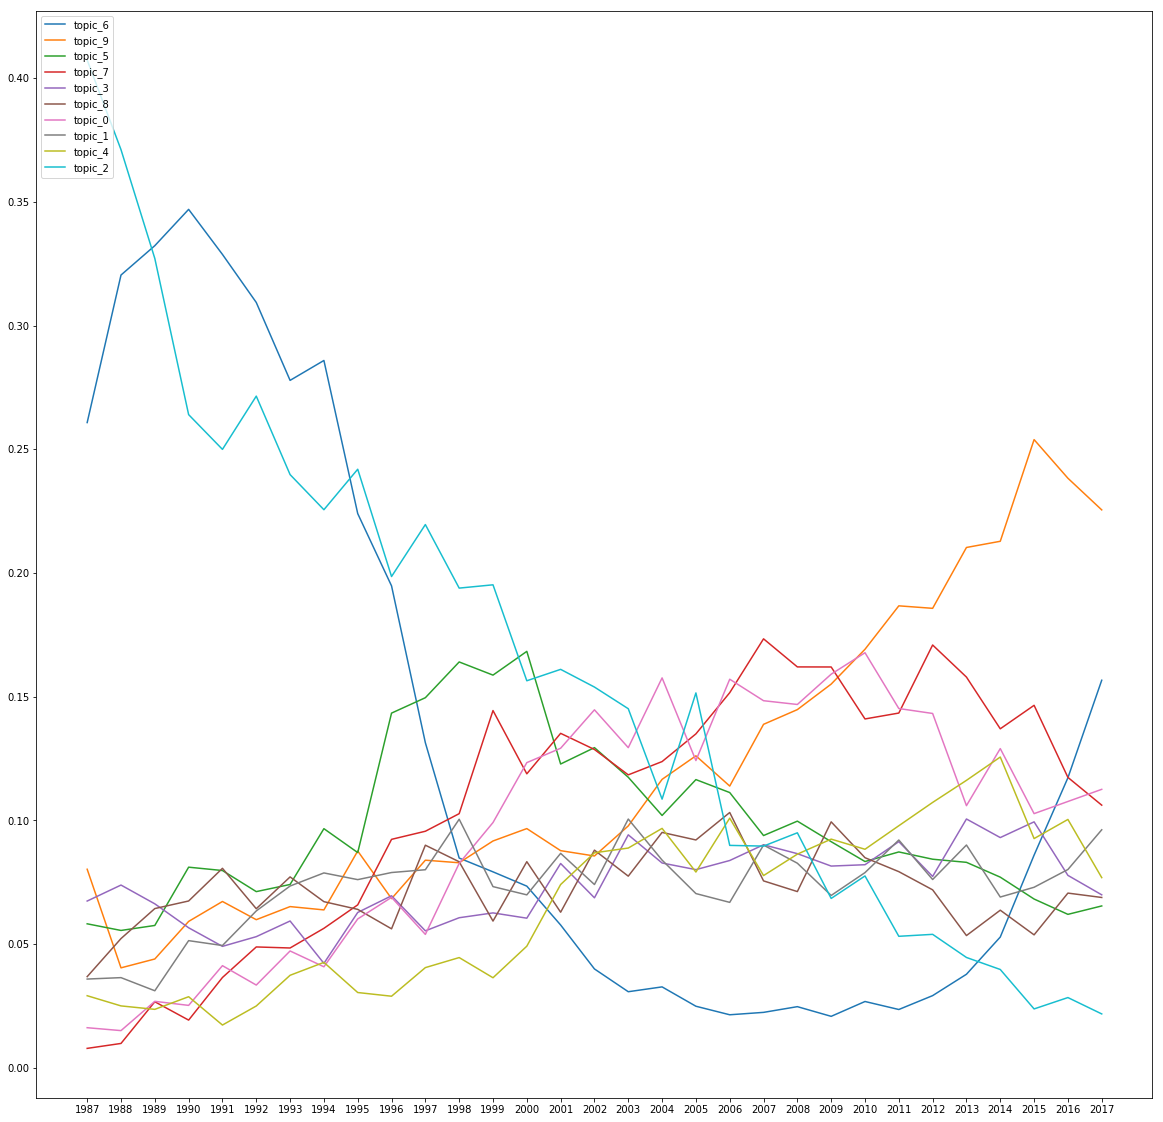

In [27]:
df_tfidf_topics_year = df_topics.groupby('year').mean()
topics = set(topic_list)
plot_trend(df_tfidf_topics_year, topics)